<h1>Data Story

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
## Importing csv files into panda DataFrames

In [6]:
filenameTeam = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/nfl_teams.csv'
filenameStadiums = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/nfl_stadiums.csv'
filenameGames = '/Users/Rezalution/Desktop/nfl-scores-and-betting-data/spreadspoke_scores.csv'

In [7]:
nflTeams = pd.read_csv(filenameTeam,encoding ='latin1')
nflStadiums = pd.read_csv(filenameStadiums,encoding ='latin1')
nflGames = pd.read_csv(filenameGames,encoding ='latin1')

In [8]:
nflTeams.head()

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central


In [9]:
nflStadiumsCleaned = nflStadiums.drop(columns=['stadium_open','stadium_close','stadium_address','stadium_weather_station_code','stadium_capacity','STATION','NAME','LATITUDE','LONGITUDE'])

In [10]:
nflStadiumsCleaned.head()

,stadium_name,stadium_location,stadium_type,stadium_weather_type,stadium_surface,ELEVATION
0,Alamo Dome,"San Antonio, TX",indoor,dome,FieldTurf,NaN
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN
2,Alumni Stadium,"Chestnut Hill, MA",outdoor,cold,Grass,NaN
3,Anaheim Stadium,"Anaheim, CA",outdoor,warm,NaN,NaN
4,Arrowhead Stadium,"Kansas City, MO",outdoor,cold,Grass,264.9


In [11]:
nflStadiumsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
stadium_name            100 non-null object
stadium_location        100 non-null object
stadium_type            93 non-null object
stadium_weather_type    93 non-null object
stadium_surface         53 non-null object
ELEVATION               52 non-null float64
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [12]:
nflStadiumsCleaned[pd.isnull(nflStadiumsCleaned['stadium_type'])]

,stadium_name,stadium_location,stadium_type,stadium_weather_type,stadium_surface,ELEVATION
1,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN
16,Dolphin Stadium,"Miami, FL",NaN,NaN,NaN,NaN
35,Jack Murphy Stadium,"San Diego, CA",NaN,NaN,NaN,NaN
36,Joe Robbie Stadium,"Miami, FL",NaN,NaN,NaN,NaN
65,Pro Player Stadium,"Miami, FL",NaN,NaN,NaN,NaN
79,Stanford Stadium,"Palo Alto, CA",NaN,NaN,NaN,NaN
83,Tampa Stadium,"Tampa, FL",NaN,NaN,NaN,NaN


In [13]:
nflGamesCleaned = nflGames.drop(columns=['over_under_line','spread_favorite','weather_detail'])

In [14]:
nflGamesCleaned.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,Orange Bowl,False,83.0,6.0,71
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,Rice Stadium,False,81.0,7.0,70
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,Balboa Stadium,False,70.0,7.0,82
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,Orange Bowl,False,82.0,11.0,78
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,Lambeau Field,False,64.0,8.0,62


In [15]:
nflGamesCleaned = nflGamesCleaned.dropna(axis=0,subset=['weather_temperature'])

In [16]:
nflGamesCleaned.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,Orange Bowl,False,83.0,6.0,71
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,Rice Stadium,False,81.0,7.0,70
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,Balboa Stadium,False,70.0,7.0,82
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,Orange Bowl,False,82.0,11.0,78
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,Lambeau Field,False,64.0,8.0,62


In [17]:
nflGamesCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11934 entries, 0 to 12658
Data columns (total 14 columns):
schedule_date          11934 non-null object
schedule_season        11934 non-null int64
schedule_week          11934 non-null object
schedule_playoff       11934 non-null bool
team_home              11934 non-null object
score_home             11878 non-null float64
score_away             11878 non-null float64
team_away              11934 non-null object
team_favorite_id       9629 non-null object
stadium                11934 non-null object
stadium_neutral        11934 non-null bool
weather_temperature    11934 non-null float64
weather_wind_mph       11934 non-null float64
weather_humidity       8388 non-null object
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [18]:
nflGamesCleaned = nflGamesCleaned.dropna(axis=0,subset=['score_home'])

In [19]:
nflGamesCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11878 entries, 0 to 12410
Data columns (total 14 columns):
schedule_date          11878 non-null object
schedule_season        11878 non-null int64
schedule_week          11878 non-null object
schedule_playoff       11878 non-null bool
team_home              11878 non-null object
score_home             11878 non-null float64
score_away             11878 non-null float64
team_away              11878 non-null object
team_favorite_id       9629 non-null object
stadium                11878 non-null object
stadium_neutral        11878 non-null bool
weather_temperature    11878 non-null float64
weather_wind_mph       11878 non-null float64
weather_humidity       8388 non-null object
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [20]:
seasonGames = nflGamesCleaned['schedule_season'].value_counts().sort_index()

In [119]:
seasonGames

1966    130
1967    122
1968    123
1969    123
1970    189
1971    189
1972    189
1973    189
1974    189
1975    189
1976    203
1977    203
1978    233
1979    225
1980    225
1981    225
1982    127
1983    225
1984    225
1985    225
1986    224
1987    170
1988    225
1989    226
1990    224
1991    228
1992    226
1993    227
1994    225
1995    240
1996    241
1997    240
1998    243
1999    254
2000    250
2001    251
2002    256
2003    259
2004    258
2005    258
2006    259
2007    258
2008    259
2009    262
2010    258
2011    258
2012    259
2013    257
2014    267
2015    267
2016    267
2017    267
2018    267
Name: schedule_season, dtype: int64

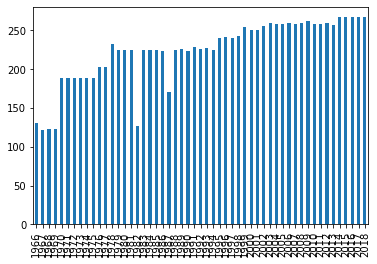

In [123]:
seasonGames.plot.bar()

NFL data that will be used is from the 1996 season to 2018. There was 2019 data in the dataset but it did not include the necessary information needed for the analysis. There still is enough data from the pervious seasons to proceed.

In [122]:
stadiumTypes = nflStadiumsCleaned['stadium_type'].value_counts()

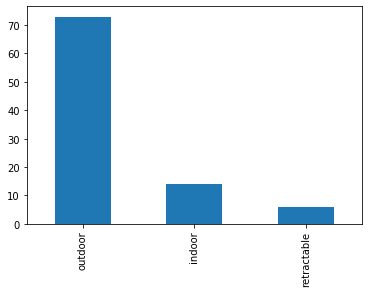

In [125]:
stadiumTypes.plot.bar()

A majority of NFL stadiums are outdoors, meaning there is no roof covering to pervent outside weather conditions from effecting the game. This will be helpful for the analysis since I will be testing how much weather effects the outcome of games. Retractable games will be ignored since the dataset does not include clarification if the roof was closed or open during the game. Including it may skew the results. Indoor games will be used as a control since weatehr conditions do not effect the outcome.

In [25]:
stadiumWeatherTypes = nflStadiumsCleaned['stadium_weather_type'].value_counts()

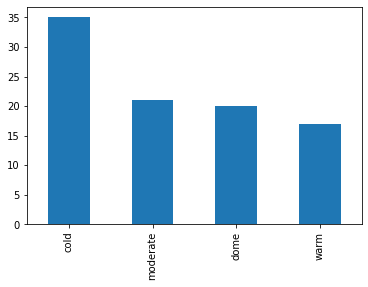

In [26]:
stadiumWeatherTypes.plot.bar()

In [27]:
stadiumSurface = nflStadiumsCleaned['stadium_surface'].value_counts()

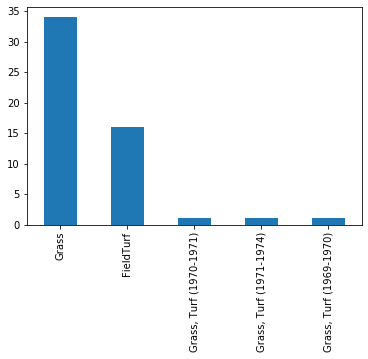

In [28]:
stadiumSurface.plot.bar()

In [126]:
nflStadiumsCleaned.groupby('stadium_type')['stadium_surface'].value_counts()

stadium_type  stadium_surface        
indoor        FieldTurf                   6
outdoor       Grass                      31
              FieldTurf                   7
              Grass, Turf (1969-1970)     1
              Grass, Turf (1970-1971)     1
              Grass, Turf (1971-1974)     1
retractable   FieldTurf                   3
              Grass                       3
Name: stadium_surface, dtype: int64

A majoity of stadiums have grass fields. This will be vital to the anaylsis since weather conditions like rain or snow may effect the field conditions which in turn may change the outcome. The stadium type along with field surface will be tested on their effects on the game.

In [30]:
gamesStadiums = pd.merge(nflGamesCleaned,nflStadiumsCleaned,how='left',left_on='stadium',right_on='stadium_name')

In [31]:
nullStadiums = gamesStadiums[pd.isnull(gamesStadiums['stadium_name'])]

In [32]:
nullStadiums['stadium'].value_counts()

FedEx Field              177
Fenway Park               12
Mercedes-Benz Stadium      9
TIAA Bank Field            6
Tottenham Stadium          1
Name: stadium, dtype: int64

In [33]:
gamesStadiums['scoreDiff'] = gamesStadiums['score_home'] - gamesStadiums['score_away']

In [77]:
gamesStadiums.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,stadium,...,stadium_name,stadium_location,stadium_type,stadium_weather_type,stadium_surface,ELEVATION,scoreDiff,homeWin,AwayWin,weather_temperatureRounded
0,09/02/1966,1960,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,Orange Bowl,...,Orange Bowl,"Miami, FL",outdoor,warm,NaN,8.8,-9.0,0,1,80.0
1,09/03/1966,1960,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,Rice Stadium,...,Rice Stadium,"Houston, TX",outdoor,warm,Grass,NaN,38.0,1,0,80.0
2,09/04/1966,1960,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,Balboa Stadium,...,Balboa Stadium,"San Diego, CA",outdoor,warm,Grass,NaN,20.0,1,0,70.0
3,09/09/1966,1960,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,Orange Bowl,...,Orange Bowl,"Miami, FL",outdoor,warm,NaN,8.8,-5.0,0,1,80.0
4,09/10/1966,1960,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,Lambeau Field,...,Lambeau Field,"Green Bay, WI",outdoor,cold,Grass,209.4,21.0,1,0,60.0


In [35]:
gamesStadiums['homeWin'] = gamesStadiums['scoreDiff'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
gamesStadiums['AwayWin'] = gamesStadiums['scoreDiff'].apply(lambda x: 1 if x < 0 else 0)

In [37]:
gamesStadiums['weather_temperatureRounded'] = gamesStadiums['weather_temperature'] // 10 * 10

In [95]:
gamesStadiums['schedule_season'] = gamesStadiums['schedule_season'] // 10 * 10

In [96]:
gamesStadiums['games'] = 1

In [97]:
gamesStadiums.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,stadium,...,stadium_location,stadium_type,stadium_weather_type,stadium_surface,ELEVATION,scoreDiff,homeWin,AwayWin,weather_temperatureRounded,games
0,09/02/1966,1960,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,Orange Bowl,...,"Miami, FL",outdoor,warm,NaN,8.8,-9.0,0,1,80.0,1
1,09/03/1966,1960,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,Rice Stadium,...,"Houston, TX",outdoor,warm,Grass,NaN,38.0,1,0,80.0,1
2,09/04/1966,1960,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,Balboa Stadium,...,"San Diego, CA",outdoor,warm,Grass,NaN,20.0,1,0,70.0,1
3,09/09/1966,1960,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,Orange Bowl,...,"Miami, FL",outdoor,warm,NaN,8.8,-5.0,0,1,80.0,1
4,09/10/1966,1960,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,Lambeau Field,...,"Green Bay, WI",outdoor,cold,Grass,209.4,21.0,1,0,60.0,1


In [132]:
gamesStadiums[['stadium_type','weather_temperature']].groupby(['stadium_type']).describe()

weather_temperature                                          \
                           count       mean        std   min   25%   50%   
stadium_type                                                               
indoor                    1986.0  72.000000   0.000000  72.0  72.0  72.0   
outdoor                   9164.0  54.985596  15.633036  -6.0  44.0  56.0   
retractable                523.0  71.053537   7.861164  26.0  72.0  72.0   

                          
               75%   max  
stadium_type              
indoor        72.0  72.0  
outdoor       66.0  97.0  
retractable   72.0  92.0

The average temperature for indoor and retractable games is around 71-72 degrees. This makes sense because the temeperature is controlled within the stadiums. Even the max and min are the same 72 degrees for indoor stadiums because of the temperature control. Retractable stadiums however have a min of 26 and max of 92 degrees, these must be when the roof was opened. Outdoor stadiums have an average temperature of 55 degrees, with a min of -6 and a max of 97 degrees. This shows a wide range of temperatures which will help in the analysis to see how much the cold and heat effects the outcome. A question being does cold temperatures aid teams that play in the cold and hot temperatures aid teams that usually play in warmer climates? This will be a major test for this analysis. 

In [133]:
gamesStadiums[['stadium_type','schedule_season','games']].groupby(['schedule_season','stadium_type']).count()

games
schedule_season stadium_type       
1960            indoor           14
                outdoor         472
1970            indoor          178
                outdoor        1820
1980            indoor          417
                outdoor        1680
1990            indoor          573
                outdoor        1703
                retractable      48
2000            indoor          479
                outdoor        1837
                retractable     174
2010            indoor          325
                outdoor        1652
                retractable     301

In [41]:
gamesStadiums['weather_temperatureRounded'].value_counts()

 70.0    3630
 50.0    2262
 60.0    2222
 40.0    1627
 30.0    1093
 80.0     492
 20.0     391
 10.0     100
 0.0       34
 90.0      22
-10.0       5
Name: weather_temperatureRounded, dtype: int64

In [42]:
gamesStadiumsPivot = gamesStadiums[['weather_temperatureRounded','stadium_type','scoreDiff']]

In [151]:
gamesStadiumsPivot.head()

,weather_temperatureRounded,stadium_type,scoreDiff
0,80.0,outdoor,-9.0
1,80.0,outdoor,38.0
2,70.0,outdoor,20.0
3,80.0,outdoor,-5.0
4,60.0,outdoor,21.0


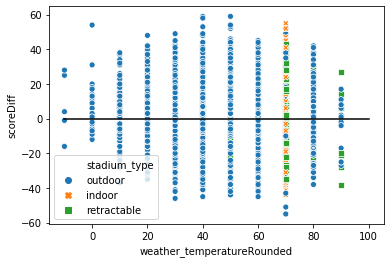

In [148]:
sns.scatterplot(x='weather_temperatureRounded',y='scoreDiff',hue='stadium_type',style='stadium_type',data=gamesStadiumsPivot)
plt.plot([100,-10],[0,0],'k-')

I took the home team score and subtracted it by the away team score. This provide me with a score difference with positive numbers meaning the home team won and by how much, and negative numbers meaning the away team won and by how much. I also binned the weather temperatures by tens to help visually plot since there will be less categories to fill up the graph. 

When using a scatter plot to see the relationship between weather temperatures and score difference, it is too close to determine visually if there is any trend between the two. There seems to be an equal amount of positive score differences to negative score differences. Further anaylsis will need to be done to test. 

In [45]:
gamesStadiumsPivot.groupby(['weather_temperatureRounded','stadium_type']).mean()

scoreDiff
weather_temperatureRounded stadium_type           
-10.0                      outdoor        8.000000
 0.0                       outdoor        6.470588
 10.0                      outdoor        4.620000
 20.0                      outdoor        4.163212
                           retractable    6.000000
 30.0                      outdoor        3.643721
                           retractable    1.000000
 40.0                      outdoor        3.314413
                           retractable    5.000000
 50.0                      outdoor        3.210188
                           retractable   -1.461538
 60.0                      outdoor        2.785781
                           retractable   -0.214286
 70.0                      indoor         1.984391
                           outdoor        2.413257
                           retractable    1.696104
 80.0                      outdoor        2.378378
                           retractable    0.400000
 90.0                      outdoor       -3.692308
                           retractable   -5.777778

In [152]:
gamesStadiumsPivot.groupby('stadium_type').mean()

,weather_temperatureRounded,scoreDiff
stadium_type,,
indoor,70.000000,1.984391
outdoor,50.534701,3.093736
retractable,68.298279,1.124283


The mean score difference for indoor and retractable stadiums is 1-2 points. Outdoor stadiums however have a score difference of 3. A hypothesis can be tested is that since outdoors have a higher score difference, weather does have an effect on the outcome in favor of home teams. Indoor and retractable stadiums also show a positive score difference for the home team but weather does not effect the game because of the stadium temperature being controlled. This does though add evidence towards a home field advantage, especially since all 3 stadium types have a psotive score difference for home teams.

In [47]:
gamesStadiumsOutdoors = gamesStadiums[gamesStadiums['stadium_type'] == 'outdoor']

In [48]:
gamesStadiumsIndoors = gamesStadiums[gamesStadiums['stadium_type'] == 'indoor']

In [49]:
gamesStadiumsOutdoors['weather_temperatureRounded'].value_counts()

 50.0    2179
 60.0    2138
 40.0    1568
 70.0    1222
 30.0    1075
 80.0     444
 20.0     386
 10.0     100
 0.0       34
 90.0      13
-10.0       5
Name: weather_temperatureRounded, dtype: int64

In [50]:
gamesStadiumsIndoors['weather_temperatureRounded'].value_counts()

70.0    1986
Name: weather_temperatureRounded, dtype: int64

In [51]:
gamesStadiumsOutdoors = gamesStadiumsOutdoors.pivot_table(index='weather_temperatureRounded',values='scoreDiff',aggfunc=np.mean)

In [52]:
gamesStadiumsOutdoors

,scoreDiff
weather_temperatureRounded,
-10.0,8.000000
0.0,6.470588
10.0,4.620000
20.0,4.163212
30.0,3.643721
40.0,3.314413
50.0,3.210188
60.0,2.785781
70.0,2.413257


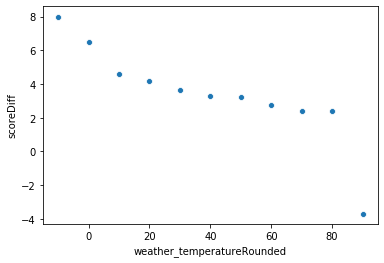

In [154]:
sns.scatterplot(x=gamesStadiumsOutdoors.index,y='scoreDiff',data=gamesStadiumsOutdoors)

When comparing outdoor stadium temperatures against the score difference, there are two interesting observation I found. Games with low cold temperatures had a higher score difference. This shows that home teams won by a bigger differnce when the temperatures were very cold. A hypothesis supported from this and which can be tested is that cold temperatures aid home teams. On the other hand games with high temperatures, 90 and above, have a negative score difference. This is interesting because just using this graph it can be said that extrememly high temperatures aid away teams, which contradicts an early hypothesis of temperature aiding the home team be it cold or hot. Further testing will need to be done to see if there are any other factors effecting this outcome, like the games when played in regularly cold areas but those game days had irregularly high temperatures. Also adding to that the away teams may have been from warmer climates.

In [54]:
homeWins = gamesStadiums['homeWin'].value_counts()

In [55]:
homeWins

1    6815
0    5063
Name: homeWin, dtype: int64

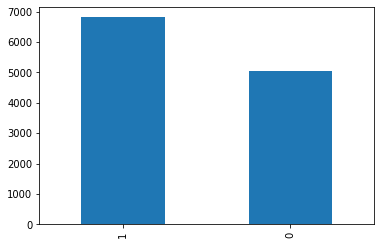

In [56]:
homeWins.plot.bar()

In [57]:
homeWins = gamesStadiums[['homeWin','AwayWin','schedule_season','stadium_type']]

In [58]:
homeWins

,homeWin,AwayWin,schedule_season,stadium_type
0,0,1,1960,outdoor
1,1,0,1960,outdoor
2,1,0,1960,outdoor
3,0,1,1960,outdoor
4,1,0,1960,outdoor
...,...,...,...,...
11873,1,0,2010,outdoor
11874,1,0,2010,indoor
11875,0,1,2010,outdoor
11876,0,1,2010,indoor


In [59]:
homeWinsYear = homeWins.set_index('schedule_season')

In [60]:
homeWinsYear

,homeWin,AwayWin,stadium_type
schedule_season,,,
1960,0,1,outdoor
1960,1,0,outdoor
1960,1,0,outdoor
1960,0,1,outdoor
1960,1,0,outdoor
...,...,...,...
2010,1,0,outdoor
2010,1,0,indoor
2010,0,1,outdoor


In [61]:
homeWinsYear = homeWinsYear.groupby(level=0).sum()

In [62]:
homeWinsYear.head()

,homeWin,AwayWin
schedule_season,,
1960,258,215
1970,1131,835
1980,1202,885
1990,1398,948
2000,1471,1097


In [63]:
homeWinsYear['HomeWinPer'] = homeWinsYear['homeWin'] / (homeWinsYear['homeWin']  + homeWinsYear['AwayWin'] )

In [64]:
homeWinsYear.head()

,homeWin,AwayWin,HomeWinPer
schedule_season,,,
1960,258,215,0.545455
1970,1131,835,0.575280
1980,1202,885,0.575946
1990,1398,948,0.595908
2000,1471,1097,0.572819


In [156]:
homeWinsYear['HomeWinPer'].mean()

0.5732600701931208

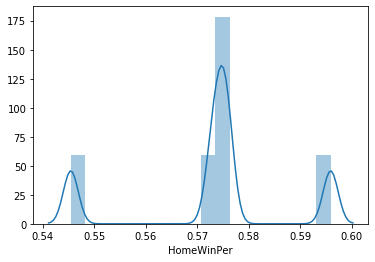

In [66]:
sns.distplot(homeWinsYear['HomeWinPer'])

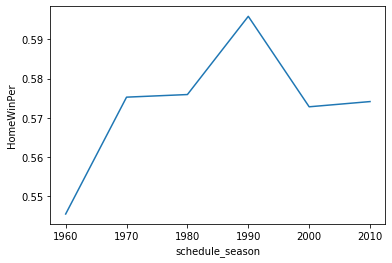

In [157]:
sns.lineplot(x=homeWinsYear.index, y='HomeWinPer', data=homeWinsYear)#.set(ylim=(0,1))

When taking the percentage of games won by the home team, there is a slight tilt towards a home field advantage. Home teams win on average 57% of the time. Even when breaking it by decades, there has not been a decade where the home teams have lost more than away teams. The beginning of the NFL had the lowest win percentage for home teams at around 54.6% and the 1990s with the highest at 60.0%.

In [68]:
homeWinsStadium = homeWins.set_index('stadium_type')

In [69]:
homeWinsStadium.drop(['schedule_season'], axis=1)

,homeWin,AwayWin
stadium_type,,
outdoor,0,1
outdoor,1,0
outdoor,1,0
outdoor,0,1
outdoor,1,0
...,...,...
outdoor,1,0
indoor,1,0
outdoor,0,1


In [70]:
homeWinsStadium = homeWinsStadium.pivot_table(index=['stadium_type'],values=['homeWin','AwayWin'],aggfunc=sum)

In [71]:
homeWinsStadium['HomeWinPer'] = homeWinsStadium['homeWin'] / (homeWinsStadium['homeWin']  + homeWinsStadium['AwayWin'] )

In [72]:
homeWinsStadium

,AwayWin,homeWin,HomeWinPer
stadium_type,,,
indoor,889,1094,0.551689
outdoor,3763,5329,0.586120
retractable,228,294,0.563218


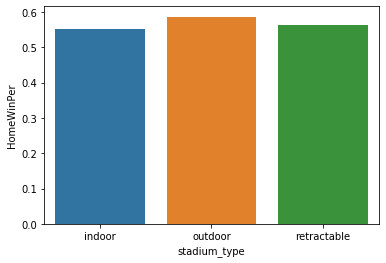

In [73]:
sns.barplot(x=homeWinsStadium.index,y=homeWinsStadium['HomeWinPer'],data=homeWinsStadium)

Even when taking into account stadium types there seems to be a home field advantage. All three types have a home team win percentage of 55% - 59%. Just like score differences indoor and retractable have similar percentages, while outdoor stadiums having the highest win percentage. This further aids in the hypothesis that weather effects the outcome of games by aiding the home team.